# Supervised Algorithm
Author: Xiaolan

## Overview
### 1. Regression (continuous)
- [1.1 Linear Models](#1.1-Linear-Models)
- [1.2 Decision Trees](#1.2-Decision-Trees)
- [1.3 Random Forest](#1.3-Random-Forest)

### 2. Classification (discrete)
- [2.1 Support Vector Machines](#2.1-Support-Vector-Machines)
- [2.2 Stochastic Gradient Descent](#2.2-Stochastic-Gradient-Descent)
- [2.3 Nearest Neighbors](#2.3-Nearest-Neighbors)
- [2.4 Naive Bayes](#2.4-Naive-Bayes)

In [2]:
# import all libraries
import numpy as np
import pandas as pd
import math, datetime, pickle, random, warnings
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import svm
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing, neighbors
from sklearn.neighbors import KNeighborsClassifier
import sklearn.preprocessing
from statistics import mean
from collections import Counter
from sklearn.tree import DecisionTreeClassifier

# 1.1 Linear Models
## Ordinary Least Squares

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

Coefficients:
 [938.23786125]
Intercept:
 152.91886182616167
Mean square error: 2548.07


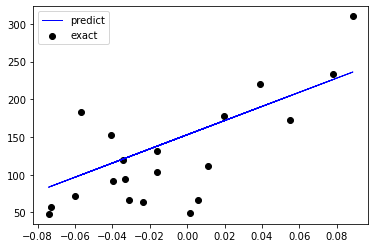

In [2]:
# load the diabets dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_x1 = diabetes_X[:, np.newaxis, 2] # newaxis to change 1 array to 2 arrays

def TrainData(diabetes_X, diabetes_y):
    # Split the data into training/testing sets
    diabetes_X_train = diabetes_X[:-20]
    diabetes_X_test = diabetes_X[-20:]

    # Split the targets into training/testing sets
    diabetes_y_train  = diabetes_y[:-20]
    diabetes_y_test = diabetes_y[-20:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Trian the model using the traing sets
    regr.fit(diabetes_X_train, diabetes_y_train)

    # Make predictions using the testing set
    diabetes_y_pred = regr.predict(diabetes_X_test)

    # The coefficients
    print('Coefficients:\n', regr.coef_)
    # The coefficients
    print('Intercept:\n', regr.intercept_)
    # The mean square error
    print('Mean square error: %.2f'
         % mean_squared_error(diabetes_y_test, diabetes_y_pred))
    return diabetes_X_test, diabetes_y_test, diabetes_y_pred

diabetes_X_test, diabetes_y_test, diabetes_y_pred = TrainData(diabetes_x1, diabetes_y)
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'black',label='exact')
plt.plot(diabetes_X_test, diabetes_y_pred, color = 'blue', linewidth = 1, label='predict')
plt.legend(loc="upper left")

plt.show()

In [3]:
diabetes_x2 = diabetes_X[:, 2:5]
diabetes_X_test, diabetes_y_test, diabetes_y_pred = TrainData(diabetes_x2, diabetes_y)

Coefficients:
 [770.91913228 400.70644175  53.99579803]
Intercept:
 152.89941462560384
Mean square error: 2582.11


## Case Study: Stock Price

In [27]:
df_stock = pd.read_csv('https://raw.githubusercontent.com/xiaolancara/Product_Studio/master/AMAZON%20_stock.csv')
df_stock = df_stock.set_index('Date')
forecast_col = 'Adj Close'
df_stock.fillna(-99999,inplace = True)

forecast_out = int(math.ceil(0.01*len(df_stock)))
df_stock['label'] = df_stock[forecast_col].shift(-forecast_out)

X = np.array(df_stock.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df_stock.dropna(inplace = True)
y = np.array(df_stock['label'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

clf = linear_model.LinearRegression(n_jobs = -1)
clf.fit(X_train, y_train)
# save classifier, do not need to retrain it every time
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf,f)

pickle_in  = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict(X_lately)
print('forecast_set {}\n forecast_days {}\n accuracy {}'.format(forecast_set,forecast_out,accuracy))




forecast_set [1637.14796803 1687.97550193 1701.65356051 1708.37365574 1712.20920975
 1651.39609606 1653.31958032 1668.10134706 1686.2805286  1649.81741442
 1613.25235355 1686.09790346 1734.72344201]
 forecast_days 13
 accuracy 0.983301565209972


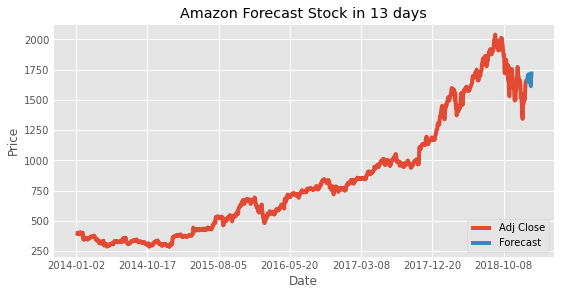

In [28]:
style.use('ggplot')
df_stock['Forecast'] = np.nan 
last_date = df_stock.iloc[-1].name # index, which is date
last_date = datetime.datetime.strptime(last_date, "%Y-%m-%d")
last_unix = last_date.timestamp()
one_more_day = 86400 #sec
next_unix = last_unix +one_more_day
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_more_day
    df_stock.loc[next_date] = [np.nan for _ in range(len(df_stock.columns)-1)] + [i]
    
df_stock[forecast_col].plot(figsize = (8,4),title = 'Amazon Forecast Stock in 13 days')
df_stock.Forecast.plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Break Down Linear Regression
__Slope formula:__
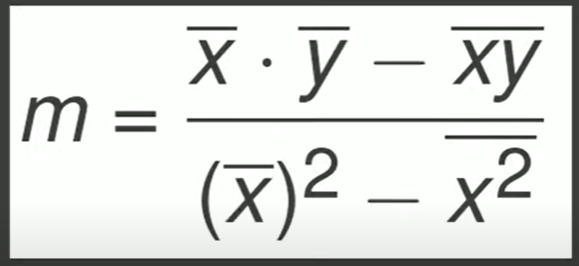

__Intercept formula:__
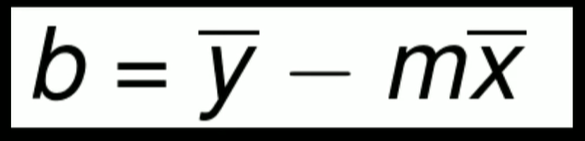

__Squared error formula: (bigger means error is lower)__
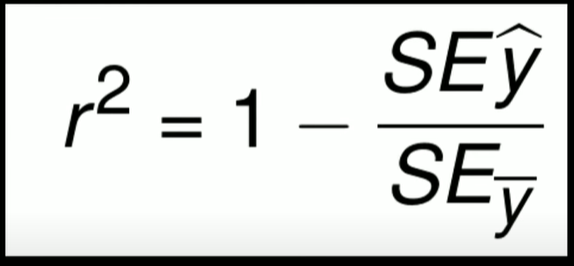

https://www.youtube.com/watch?v=QUyAFokOmow&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=11

In [7]:
random.randrange(-40, 40)

-6

0.9369155059892367


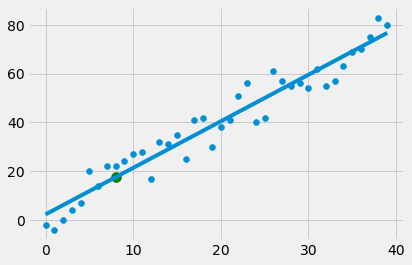

In [21]:
style.use('fivethirtyeight')

# xs = np.array([1,2,3,4,5,6], dtype = np.float64)
# ys = np.array([5,4,6,5,6,7], dtype = np.float64)
def create_dataset(num_data, variance, step = 2, correlation = False):
    val = 1
    ys = []
    for i in range(num_data):
        #returns a number between -variance (included) and variance (not included)
        y = val + random.randrange(-variance, variance) 
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64)

def best_fit_slope_and_intercept(xs, ys):
    m = ((mean(xs) * mean(ys)) - mean(xs*ys)) / ((mean(xs)**2 - mean(xs**2)))
    b = mean(ys) - m*mean(xs)
    return m,b

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

xs, ys = create_dataset(40, 10, correlation = 'pos')
m,b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

predict_x = 8
predict_y = (m*predict_x)+b

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y,s = 100,color = 'g')
plt.plot(xs, regression_line)
plt.show()


# 1.2 Decision Trees

It can handle both numerical and categorical variables.

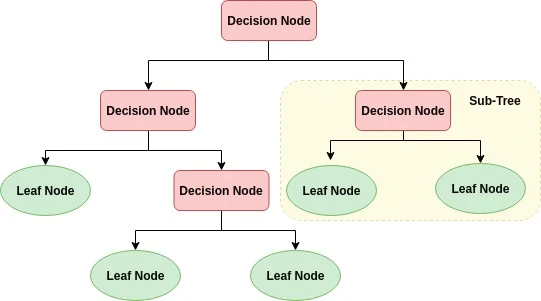

### Break down algorithm
1. 
(code 1) https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb

(explanation 1)https://www.youtube.com/watch?v=LDRbO9a6XPU&ab_channel=GoogleDevelopers

2. 
(explanation 2)https://www.youtube.com/watch?v=g9c66TUylZ4&ab_channel=StatQuestwithJoshStarmer



### Case Study- zoo animals

Dataset is from [Kaggle, zoo-animal](https://www.kaggle.com/uciml/zoo-animal-classification).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('Machine Learning Dataset/zoo.csv')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df_class = pd.read_csv('Machine Learning Dataset/class.csv')
df_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


### EDA

C:\Users\xiaon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


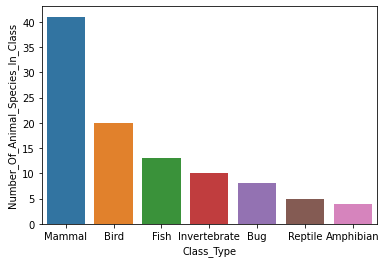

In [4]:
sns.barplot(df_class['Class_Type'],
            df_class['Number_Of_Animal_Species_In_Class'],
            order =df_class.sort_values('Number_Of_Animal_Species_In_Class',ascending = False).Class_Type ) #sort bars
plt.show()

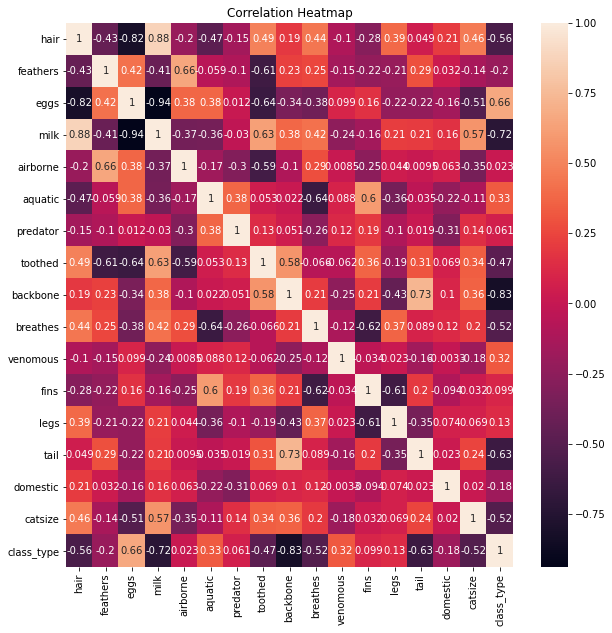

In [5]:
plt.subplots(figsize=(10,10))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [6]:
corr[corr != 1][abs(corr)> 0.7].dropna(how='all', axis=1).dropna(how='all', axis=0)

,hair,eggs,milk,backbone,tail,class_type
hair,NaN,-0.817382,0.878503,NaN,NaN,NaN
eggs,-0.817382,NaN,-0.938848,NaN,NaN,NaN
milk,0.878503,-0.938848,NaN,NaN,NaN,-0.723683
backbone,NaN,NaN,NaN,NaN,0.731762,-0.828845
tail,NaN,NaN,NaN,0.731762,NaN,NaN
class_type,NaN,NaN,-0.723683,-0.828845,NaN,NaN


In [7]:
features = list(df.columns)
print(features)

['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']


In [8]:
df.class_type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [10]:
features.remove('class_type')
features.remove('animal_name')
print(features)

['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']


In [11]:
X = df[features].values.astype(np.float32)
Y = df.class_type
print(X.shape)
print(Y.shape)

(101, 16)
(101,)


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50, 16)
(50,)
(51, 16)
(51,)


In [13]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print("training accuracy :", model.score(X_train, Y_train))
print("testing accuracy :", model.score(X_test, Y_test))

training accuracy : 1.0
testing accuracy : 0.9019607843137255


In [14]:
X_test[0:1]

array([[1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 4., 1., 0., 0.]],
      dtype=float32)

In [15]:
model.predict(X_test[0:1])

array([1], dtype=int64)

# 1.3 Random Forest

# 2.1 Support Vector Machines

SVMs are a set of supervised learning methods used for classification, regression and outliers detection.

![SVM](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

Classification

![Classification](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

Non_Linear and Linear

![non_linear](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index_bnr4rx.png)

__Linear Kernel:__
K(x,xi) = sum(x * xi)

__Polynomial Kernel:__
K(x,xi) = 1 + sum(x * xi)^d

__Radial Basis Function Kernel:__
K(x,xi) = exp(-gamma * sum((x – xi)^2)

Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. 

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

https://scikit-learn.org/stable/modules/svm.html#regression

In [6]:
#Load dataset
cancer = datasets.load_breast_cancer()

# print the names of the features
print('Features:', cancer.feature_names)

# print the label type of cancer
print('Target_names:', cancer.target_names)

# print data(feature)shape
print('DataShape:', cancer.data.shape)

print('-----------------')
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

print('-----------------')
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target_names: ['malignant' 'benign']
DataShape: (569, 30)
-----------------
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e

C:\Users\xiaon\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


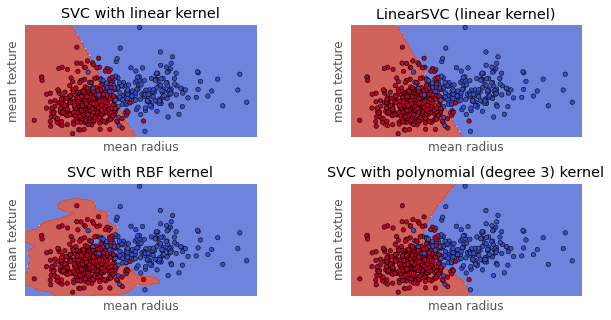

In [7]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



# Take the first two features. We could avoid this by using a two-dim dataset
X = cancer.data[:, :2]  
y = cancer.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize = (10,5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('mean radius')
    ax.set_ylabel('mean texture')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [8]:
# Split dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.3,
                                                   random_state = 109) 
# Create a svm classifier
clf = svm.SVC(kernel = 'linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print('Precision:', metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print('Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9811320754716981
Recall: 0.9629629629629629


The classification Accuracy of 96.49%, precision of 98% and recall of 96%, which are considered as very good values.

# 3. Stochastic Gradient Descent

SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

The word ‘stochastic‘ means a system or a process that is linked with a random probability. Hence, in Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for each iteration. 

![SGD algorithm cost function](https://media.geeksforgeeks.org/wp-content/uploads/sgdn.png)

# 4. Nearest Neighbors

KNN performs better with a lower number of features than a large number of features.
Research has also shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.

Generally, Data scientists choose as an odd number if the number of classes is even. 

KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance. Also, handling missing values will help us in improving results.

KNN runs this formula to compute the distance between each data point and the test data

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

https://medium.com/capital-one-tech/k-nearest-neighbors-knn-algorithm-for-machine-learning-e883219c8f26

In [9]:
# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [10]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers
weather_encoded = le.fit_transform(weather)
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

print(weather_encoded)
# Overcast: 0, Rainy: 1, and Sunny: 2
print(temp_encoded)
# Cool: 0, Hot: 1, Mild: 2
print(label)
# No: 0, Yes: 1

# combining weather and tem into single list of tuples
features = list(zip(weather_encoded, temp_encoded))

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [11]:
# Generate KNN classifier Model (two labels)
model = KNeighborsClassifier(n_neighbors = 3)

# Train the model using the training sets
model.fit(features, label)

# Predict Output
predict = model.predict([[0,2]]) # sample: 0: Overcast, 2: Mild
print(predict)

[1]


In [12]:
# Generate KNN classifier Model (multiple labels)
# load winedataset
wine = datasets.load_wine()

print(wine.data[0:5])
print('--------------')
print(wine.target)
print('--------------')
print(wine.feature_names)
print(wine.target_names)
print(wine.data.shape)

# splitting data 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                   test_size = 0.3, random_state = 1)


[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
--------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 

In [13]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)

# how often is the classifier correct
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7037037037037037


In [14]:
#Create KNN Classifier for k=7
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# how often is the classifier correct
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6481481481481481


## Case Study: Breast Cancer

In [35]:
accuracies = []
for i in range(25):
    df = pd.read_csv('https://raw.githubusercontent.com/xiaolancara/Self-study-Machine-Learning/main/datasets/breast-cancer-wisconsin.data')
    df.replace('?', -99999, inplace = True)
    df.drop(['id'], 1, inplace = True)

    X = np.array(df.drop(['class'],1))
    y = np.array(df['class'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    clf = neighbors.KNeighborsClassifier(n_jobs = -1) # n_jobs is default as 1, -1 can be speeding up the calculation
    clf.fit(X_train, y_train)

    accuracy = clf.score(X_test, y_test)
#     print(accuracy)

#     example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,2,2,2,3,2,1]])
#     example_measures = example_measures.reshape(len(example_measures),-1)
#     prediction = clf.predict(example_measures)
#     print(prediction)
    accuracies.append(accuracy)
print(sum(accuracies)/len(accuracies))

0.97


### Break Down K Neareast Neighbors
__Euclidean Distance:__
![knn distance algorithm](https://miro.medium.com/max/595/0*afh-89Pe_pFauS28)

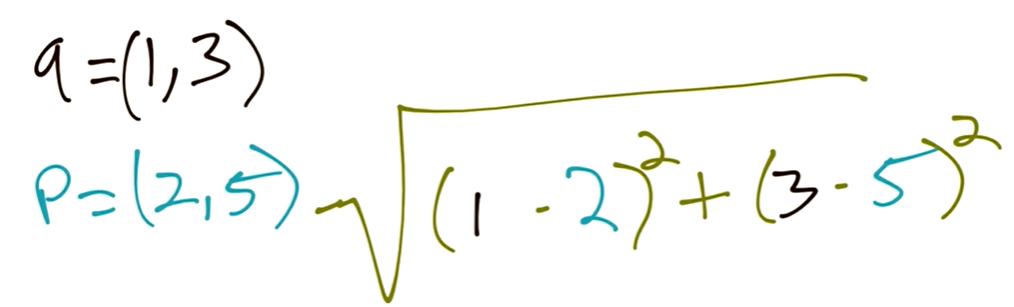

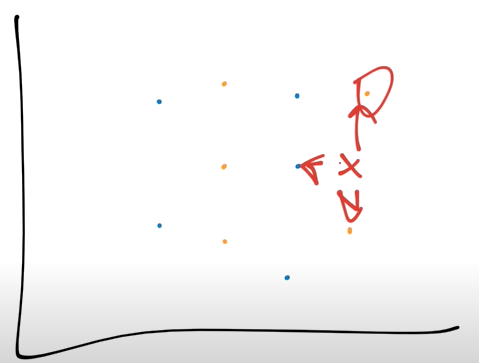

https://www.youtube.com/watch?v=n3RqsMz3-0A&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=16

https://www.youtube.com/watch?v=r_D5TTV9-2c&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=19

result r confidence 1.0


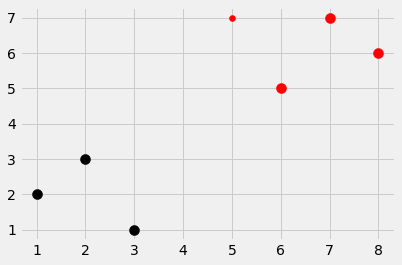

In [31]:
style.use('fivethirtyeight')
# plot1 = [1,3]
# plot2 = [2,5]

# euclidean_distance = math.sqrt((plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2)
# print(euclidean_distance)

dataset = {'k': [[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7,],[8,6]]}
new_features = [5,7]


def k_nearest_neighbors(data, predict, k = 3):
    #print(len(data))
    if len(data) >= k:
        warings.warn('K is set to a value less than total voting groups!')
    
    distances = []
    for group in data:
        #print('group',group)
        for features in data[group]:
            #print('features',features)
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    #print('distances',distances)
    votes = [i[1] for i in sorted(distances)[:k]]# like append if only use one row
    #print('votes',votes)
    #print('confidence: ',Counter(votes).most_common(1)[0][1]/k)
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    #print(vote_result, confidence)
    return vote_result, confidence
result,confidence = k_nearest_neighbors(dataset, new_features, k =3)      
print('result',result, 'confidence', confidence)

[[plt.scatter(ii[0],ii[1],s = 100, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1],color = result )
plt.show()

In [33]:
accuracies = []
for i in range(25):
    df = pd.read_csv('https://raw.githubusercontent.com/xiaolancara/Self-study-Machine-Learning/main/datasets/breast-cancer-wisconsin.data')
    df.replace('?', -99999, inplace = True)
    df.drop(['id'], 1, inplace = True)
    full_data = df.astype(int).values.tolist()
    random.shuffle(full_data)

    test_size = 0.2
    train_set = {2:[], 4:[]}
    test_set = {2:[], 4:[]}
    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]


    for i in train_data:
        #print(i)
        #print(i[:-1])
        train_set[i[-1]].append(i[:-1])
    for i in test_data:
        test_set[i[-1]].append(i[:-1])
    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            vote, confidence = k_nearest_neighbors(train_set, data, k = 5) # sikit learn default k value
            if group == vote:
                correct +=1
            #else:
                #print(confidence) # low confidence such as 3/5 means there are 3/5 opposite possibility result
            total +=1
    #print('Accuracy', correct/total)
    accuracies.append(correct/total)
print(sum(accuracies)/len(accuracies))
# example_measures = np.array([4,2,1,1,1,2,3,2,1])
# example_measures = example_measures.reshape(len(example_measures),-1)
# prediction = k_nearest_neighbors(train_set, example_measures, k = 5)
# print('example prediction',prediction)

0.9712230215827337


# 5. Naive Bayes
Some of the most popular uses for them are weather prediction, email spam detection, and facial recognition. This algorithm is great for these uses because of the fact that it always assumes independence.

![Naive Bayes Algorithm](https://miro.medium.com/max/875/0*t1cHAoX-JOw3xXxN)
![eg](https://miro.medium.com/max/875/0*61yPNIDHKB8AOXLM)
![eg2](https://wizardforcel.gitbooks.io/dm-algo-top10/content/img/20140403191225109.jpg)

__P(A|B1,B2,...,Bn) = P(B1,B2,...,Bn|A)P(A)/P(B1,B2,...,Bn)__

Three of the commonly used variations are

__Gaussian__: The Gaussian Naive Bayes algorithm assumes distribution of features to be Gaussian or normal, i.e.,

__Multinomial__: The Multinomial Naive Bayes algorithm is used when the data is distributed multinomially, i.e., multiple occurrences matter a lot.

__Bernoulli__: The Bernoulli algorithm is used when the features in the data set are binary-valued. It is helpful in spam filtration and adult content detection techniques. 

Cons: If a given class and a feature have 0 frequency, then the conditional probability estimate for that category will come out as 0. This problem is known as the “Zero Conditional Probability Problem.”

https://medium.com/capital-one-tech/naives-bayes-classifiers-for-machine-learning-2e548bfbd4a1

https://wizardforcel.gitbooks.io/dm-algo-top10/content/naive-bayes.html

https://machinelearningmastery.com/naive-bayes-tutorial-for-machine-learning/

In [15]:
data = pd.read_csv('https://raw.githubusercontent.com/xiaolancara/Self-study-Machine-Learning/main/datasets/titanic.csv')
print(data.columns)
data.head()


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
y = list(map(lambda v: 'yes' if v == 1 else 'no', data['Survived'].values)) # target values as string

# We won't use the 'Name' nor the 'Fare' field

X = data[['Pclass', 'Sex', 'Age']].values # features values #, 'SibSp', 'Parch'

In [17]:
print(len(y))

# We'll take 600 examples to train and the rest to the validation process
y_train = y[:600]
y_val = y[600:] # validation set

X_train = X[:600]
X_val = X[600:]


891


In [18]:
## Creating the Naive Bayes Classifier instance with the training data
class NaiveBayesClassifier:
    
    def __init__(self, X, y):
        
        '''
        X and y denotes the features and the target labels respectively
        '''
        self.X, self.y = X, y 
        
        self.N = len(self.X) # Length of the training set
        # print(self.N) #output: 600
        self.dim = len(self.X[0]) # Dimension of the vector of features
        # print(self.attrs) #output: 3
        self.attrs = [[] for _ in range(self.dim)] # Here we'll store the columns of the training set
        # print(self.attrs) #output: [[], [], []]
        self.output_dom = {} # Output classes with the number of ocurrences in the training set. In this case we have only 2 classes

        self.data = [] # To store every row [Xi, yi]
        
        
        for i in range(len(self.X)):
            for j in range(self.dim):
                # if we have never seen this value for this attr before, 
                # then we add it to the attrs array in the corresponding position
                if not self.X[i][j] in self.attrs[j]:
                    self.attrs[j].append(self.X[i][j])
                    
            # if we have never seen this output class before,
            # then we add it to the output_dom and count one occurrence for now
            if not self.y[i] in self.output_dom.keys():
                self.output_dom[self.y[i]] = 1
            # otherwise, we increment the occurrence of this output in the training set by 1
            else:
                self.output_dom[self.y[i]] += 1
            # store the row
            self.data.append([self.X[i], self.y[i]])  

    def classify(self, entry):

        solve = None # Final result
        max_arg = -1 # partial maximum

        for y in self.output_dom.keys():
            # self.output_dom.keys includes yes, no
            prob = self.output_dom[y]/self.N # P(y)
            #print(prob)
            for i in range(self.dim):
                cases = [x for x in self.data if x[0][i] == entry[i] and x[1] == y] # all rows with Xi = xi
                n = len(cases)
                prob *= n/self.N # P *= P(Xi = xi)
                
            # if we have a greater prob for this output than the partial maximum...
            if prob > max_arg: #yes or no 
                max_arg = prob
                solve = y

        return solve

In [19]:
nbc = NaiveBayesClassifier(X_train, y_train)
total_cases = len(y_val) # size of validation set

# Well classified examples and bad classified examples
good = 0
bad = 0

for i in range(total_cases):
    predict = nbc.classify(X_val[i])
    if y_val[i] == predict:
        good += 1
    else:
        bad += 1

print('Tol_samples:', total_cases)
print('Correct:', good)
print('Incorrect:', bad)
print('Accuracy:', good/total_cases)

Tol_samples: 291
Correct: 217
Incorrect: 74
Accuracy: 0.7457044673539519
